To run a query on the champions database use the following scheme

In [3]:
# !pip install requests

In [4]:
import requests

Request the data from the champions API available over the workstation network

In [13]:
# data = {
#   "request_data_type": "expression",
#   "request_cancer_type": ["all"],
#   "request_genes": ["AKT1"],
#   "request_models": [],
#   "request_dataset": "PDX",
#   "request_key": "your generated key",
#   "request_mode": 'true'
# }
# response = requests.post('https://lumin-fast-api.championsoncology.com/workstation',json=data)

The full set of models, cancer types, and genes are available within the requests folder.

An example of a request you could run:

In [5]:
data = {
  "request_data_type": "expression",
  "request_cancer_type": ["all"],
  "request_genes": ["ATM", "BRCA1", "BRCA2", "BRIP1", "CDK12", "CHEK2", "FANCA", "HDAC2", "KRAS", "PALB2", "SRY", "TP53", "NOTCH1"],
  "request_models": ["CTG-0009", "CTG-0011", "CTG-0012", "CTG-0017", "CTG-0018", "CTG-0019", "CTG-0033"],
  "request_dataset": "PDX",
  "request_key": "---",  # enter your token here
  "request_client": 99,
  "request_user": 99,
  "request_mode": 'true'
}
response = requests.post('https://lumin-fast-api.championsoncology.com/workstation', json=data)

In [7]:
print(response.json())

The response object will be returned as json and is generated into your root folder structure

In [4]:
[{"v1":12542076,"gene_id":"ENSG00000142208","log.rsem.rpkm":"5.92682228739914","log.tpm":"6.50015325228395","z":"0.06432156228114","fold":"1.00825623784295","trans":"ENST00000407796:92%","model":"CTG-2067","sort_key":"CTG-2067_Expression_1","gene":"AKT1","partition_0":"CTG-2067"},{"v1":2946545,"gene_id":"ENSG00000142208","log.rsem.rpkm":"6.00143443992071","log.tpm":"6.96288606798328","z":"0.163207143461503","fold":"1.02094907129583","trans":"ENST00000407796:57.93%","model":"CTG-0436","sort_key":"CTG-0436_Expression_1","gene":"AKT1"}]

[{'v1': 12542076,
  'gene_id': 'ENSG00000142208',
  'log.rsem.rpkm': '5.92682228739914',
  'log.tpm': '6.50015325228395',
  'z': '0.06432156228114',
  'fold': '1.00825623784295',
  'trans': 'ENST00000407796:92%',
  'model': 'CTG-2067',
  'sort_key': 'CTG-2067_Expression_1',
  'gene': 'AKT1',
  'partition_0': 'CTG-2067'},
 {'v1': 2946545,
  'gene_id': 'ENSG00000142208',
  'log.rsem.rpkm': '6.00143443992071',
  'log.tpm': '6.96288606798328',
  'z': '0.163207143461503',
  'fold': '1.02094907129583',
  'trans': 'ENST00000407796:57.93%',
  'model': 'CTG-0436',
  'sort_key': 'CTG-0436_Expression_1',
  'gene': 'AKT1'}]

Import the pandas library

In [17]:
import pandas as pd

Load your data into a pandas dataframe

In [18]:
df = pd.read_json('../requested_data---11-10-2021---17:48:41.json')

df.head(2)

#sample_json = [{"v1":12542076,"gene_id":"ENSG00000142208","log.rsem.rpkm":"5.92682228739914","log.tpm":"6.50015325228395","z":"0.06432156228114","fold":"1.00825623784295","trans":"ENST00000407796:92%","model":"CTG-2067","sort_key":"CTG-2067_Expression_1","gene":"AKT1","partition_0":"CTG-2067"},{"v1":2946545,"gene_id":"ENSG00000142208","log.rsem.rpkm":"6.00143443992071","log.tpm":"6.96288606798328","z":"0.163207143461503","fold":"1.02094907129583","trans":"ENST00000407796:57.93%","model":"CTG-0436","sort_key":"CTG-0436_Expression_1","gene":"AKT1"}]

#df2 = pd.read_json(sample_json)

v1          gene_id  log.rsem.rpkm   log.tpm         z      fold  \
0   308  ENSG00000012048       2.406601  3.005879 -1.232682  0.727385   
1  1576  ENSG00000083093       3.146205  3.799950  0.004078  1.000641   

                                               trans     model  \
0  ENST00000357654:34.62% ENST00000351666:18.44% ...  CTG-0009   
1  ENST00000261584:47.98% ENST00000566069:28.02% ...  CTG-0009   

                sort_key   gene model_name                tumor_type  
0  CTG-0009_Expression_1  BRCA1   CTG-0009  Adenoid cystic carcinoma  
1  CTG-0009_Expression_1  PALB2   CTG-0009  Adenoid cystic carcinoma

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

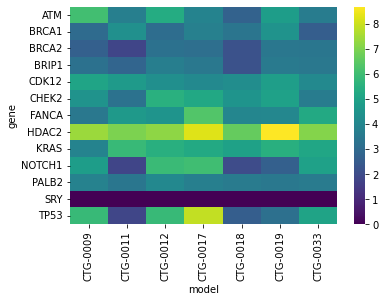

In [10]:
result = df.pivot(index='gene', columns='model', values='log.tpm')

sns.heatmap(result, fmt="g", cmap='viridis')
plt.show()

In [11]:
result

model   CTG-0009  CTG-0011  CTG-0012  CTG-0017  CTG-0018  CTG-0019  CTG-0033
gene                                                                        
ATM     6.048809  3.695959  5.324261  3.881731  2.689335  4.778746  3.604976
BRCA1   3.005879  4.309124  3.079211  3.741816  3.383718  4.439801  2.562520
BRCA2   2.612277  1.771035  3.245162  3.131647  2.173149  3.427874  3.418333
BRIP1   3.227825  2.798589  3.664485  3.467681  2.173572  3.539603  3.457129
CDK12   5.076141  4.703391  4.286160  4.086470  4.212933  4.840801  4.096867
CHEK2   4.442894  3.259121  5.499438  5.186547  4.480951  4.925794  3.620786
FANCA   3.470169  4.664768  4.473634  6.318962  3.975797  4.002422  5.243791
HDAC2   7.380528  6.956048  7.188059  8.247359  6.623563  8.674050  7.050501
KRAS    3.895217  5.844683  5.477790  5.248287  4.947568  5.479305  5.145076
NOTCH1  4.791276  1.773608  5.895624  6.025112  1.993999  2.618996  4.922705
PALB2   3.799950  3.396950  4.055603  3.699410  3.563020  3.489316  3.566488
SRY     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
TP53    5.859000  1.802825  5.860707  7.865521  2.543594  3.166362  5.042962